In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
# data used to teach
train_data = datasets.MNIST("./localTrainingData/", train=True, download=True, transform=transforms.Compose([
    # things we want to apply to the data goes in here
    transforms.ToTensor()
]))

# data the model hasn't seen, used to test
test_data = datasets.MNIST("./localTestingData/", train=False, download=True, transform=transforms.Compose([
    # things we want to apply to the data goes in here
    transforms.ToTensor()
]))

In [3]:
# batch size = how many we want to pass into our model at a time, generally use 8 - 64 - the larger, the quicker we can train, but not too big or accuracy might be low
# we have to batch because data is so big we can't fit it all in at once
train_set = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=False)

In [4]:
for data in train_set:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
x,y = data[0][0], data[1][0]

print(y)

tensor(0)


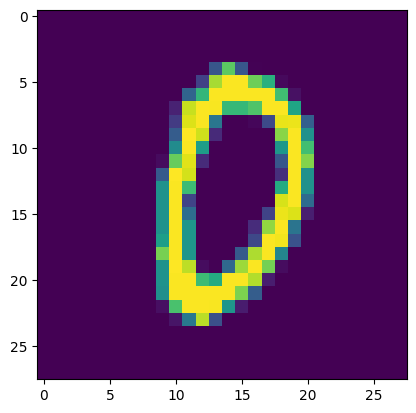

In [6]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))
plt.show()

In [7]:
# if model can find shorter path to decreasing loss, it'll take that path
# as optimiser is decreasing loss, it doesn't know how low it can get, so it'll try to lower loss as quickly and easily as possible
# if majority of data is 3 or 7, it will start to always predict 3, and will be stuck there forever 
# this is why we need to balance data

total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in train_set:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1


print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i] / total * 100}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Define layers
        # fc1 = fully connected layer 1
        self.fc1 = nn.Linear(784, 64)
        # where 784 = 28 * 28 because our images are 28x28, can't pass the image, we pass the flattened image or just a flat line of pixels
        # where 64 = can be whatever we want
        # where nn.Linear = just means fully connected
        self.fc2 = nn.Linear(64, 64)
        # because fc1 (first layer) outputs 64, second layer MUST take in 64
        # fc2 (second layer) can output whatever we want again
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        # output 10 = because number of classes in our numbers is 10 (0,1,2,...,9)

    # simple neural network also called FeedForward network, since data passes from one side to the other, nothing else
    # this method defines how data flows through our network
    def forward(self, x):
        #where x is input

        # we just pass x (input) through our layers
        x = F.relu(self.fc1(x))
        # where relu = Rectified Linear - this is our activation function
        # activation function = whether or not neuron is firing

        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        # activation function is being run on the output of each layer. Because layer 4 outputs 10, we want to return probability that a number is what the neural network thinks it is

        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
X = torch.rand((28,28))
X = x.view(-1, 28 * 28)
# where -1 = specifies this input will be of unknown shape
# where 28 = width, height of image being input

# this passes info into neural network
output = net(X)

output
# outputs grad_fn = kinda like accuracy

tensor([[-2.3270, -2.4094, -2.2300, -2.3589, -2.2448, -2.4045, -2.3835, -2.2375,
         -2.2478, -2.2105]], grad_fn=<LogSoftmaxBackward0>)